dane są pozmieniane ale nie są przygotowane do treningu (poprzerzucać wartości kolumn do meczy bo jest teraz wiersz z emczem-kursami na niego i wynikiem meczu i statystyk po tym meczu)

# 1. Initial setup

Import of libraries, global parameters.

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [232]:
df1 = pd.read_csv(r"..\data\extracted_data\20_21_final.csv")
df2 = pd.read_csv(r"..\data\extracted_data\21_22_final.csv")
df3 = pd.read_csv(r"..\data\extracted_data\22_23_final.csv")
df4 = pd.read_csv(r"..\data\extracted_data\23_24_final.csv")

df_list = [df1, df2, df3, df4]

In [233]:
joined_df = pd.concat(df_list, ignore_index=True)

# 2. Data exploration

## General overview

In this chapter, we take an initial look at the football match data that forms the foundation of our analysis. We'll explore the structure of the dataset, review the types of information it contains, and highlight key statistics. This overview sets the stage for deeper analytical work in the following chapters by helping us understand the basic characteristics and quality of the data.

Leagues in the collected dataset

In [234]:
for league in joined_df['league'].unique():
    print(f"{league}: " , joined_df.loc[joined_df['league'] == league].shape[0])

Tipico Bundesliga:  192
PKO BP Ekstraklasa:  1158
Eredivisie:  1224
Jupiler League:  1302
LaLiga:  1520
Ligue 1:  1446
Premier Liga:  960
Premiership:  912
Primeira Liga:  306
Serie A:  1520
Super League:  768
Super Lig:  1522
Bundesliga:  576
Liga Portugal:  918


In [235]:
for df in df_list:
    for league in df['league'].unique():
        print(f"{league}: " , df.loc[df['league'] == league].shape[0])
    print('==============')

Tipico Bundesliga:  192
PKO BP Ekstraklasa:  240
Eredivisie:  306
Jupiler League:  330
LaLiga:  380
Ligue 1:  380
Premier Liga:  240
Premiership:  228
Primeira Liga:  306
Serie A:  380
Super League:  180
Super Lig:  420
Bundesliga:  192
PKO BP Ekstraklasa:  306
Eredivisie:  306
Jupiler League:  330
LaLiga:  380
Ligue 1:  380
Premier Liga:  240
Premiership:  228
Liga Portugal:  306
Serie A:  380
Super League:  180
Super Lig:  380
Bundesliga:  192
PKO BP Ekstraklasa:  306
Eredivisie:  306
Jupiler League:  330
LaLiga:  380
Ligue 1:  380
Premier Liga:  240
Premiership:  228
Liga Portugal:  306
Serie A:  380
Super League:  180
Super Lig:  342
Bundesliga:  192
PKO BP Ekstraklasa:  306
Eredivisie:  306
Jupiler League:  312
LaLiga:  380
Ligue 1:  306
Premier Liga:  240
Premiership:  228
Liga Portugal:  306
Serie A:  380
Super League:  228
Super Lig:  380


We can observe an issue with *Tipico Bundesliga* and *Bundesliga*. In the 2021–22 season, the Austrian Bundesliga underwent a name change. Since the German Bundesliga data was not available on the Flashscore website (and is therefore missing from our dataframe), we simply updated the naming to reflect the correct league.

In [236]:
for _df in df_list:
    _df.loc[_df['league'] == 'Bundesliga', 'league'] = 'Tipico Bundesliga'

non-numeric columns include:
-	 match_id
-	 date
-	 league
-	 team_X
-    possession (due to % symbol at the end)
-	 team_X_formation
-	 team_X_line_Y

Note X represents 1 and 2, Y ranges from 1 to 5

In [237]:
for col in joined_df.columns:
    if joined_df[col].dtype != float: 
        print('\t', col)

	 match_id
	 date
	 league
	 team_1
	 team_2
	 possession_1
	 possession_2
	 team_1_formation
	 team_2_formation
	 team_1_line_1
	 team_1_line_2
	 team_1_line_3
	 team_2_line_1
	 team_2_line_2
	 team_2_line_3
	 team_2_line_4
	 team_1_line_4
	 team_1_line_5
	 team_2_line_5


In [238]:
home_wins = ((joined_df['goals_1'] > joined_df['goals_2'])).sum()
draws = ((joined_df['goals_1'] == joined_df['goals_2'])).sum()
away_wins = ((joined_df['goals_1'] < joined_df['goals_2'])).sum()

total_matches = len(joined_df)

print(f"Total matches:     {total_matches}")
print(f"Home wins:         {home_wins}")
print(f"Draws:             {draws}")
print(f"Away wins:         {away_wins}")


Total matches:     14324
Home wins:         6142
Draws:             3667
Away wins:         4515


We have access to standard match statistics:

In [101]:
joined_df[[col for col in joined_df.columns if not (col.startswith('bet_') or col.startswith('team_'))]].columns

Index(['match_id', 'date', 'league', 'turn', 'goals_1', 'goals_2', 'winner',
       'possession_1', 'possession_2', 'goal_chances_1', 'goal_chances_2',
       'shots_on_target_1', 'shots_on_target_2', 'shots_off_target_1',
       'shots_off_target_2', 'blocked_shots_1', 'blocked_shots_2',
       'offsides_1', 'offsides_2', 'goalkeeper_saves_1', 'goalkeeper_saves_2',
       'fouls_1', 'fouls_2', 'attacks_1', 'attacks_2', 'dangerous_attacks_1',
       'dangerous_attacks_2', 'red_cards_1', 'red_cards_2', 'free_kicks_1',
       'free_kicks_2', 'throw_ins_1', 'throw_ins_2', 'expected_goals_1',
       'expected_goals_2'],
      dtype='object')

In [102]:
joined_df[[col for col in joined_df.columns if not (col.startswith('bet_') or col.startswith('team_'))]].describe()

,turn,goals_1,goals_2,winner,goal_chances_1,goal_chances_2,shots_on_target_1,shots_on_target_2,shots_off_target_1,shots_off_target_2,...,dangerous_attacks_1,dangerous_attacks_2,red_cards_1,red_cards_2,free_kicks_1,free_kicks_2,throw_ins_1,throw_ins_2,expected_goals_1,expected_goals_2
count,14324.000000,14324.000000,14324.000000,14324.000000,14287.000000,14287.000000,14287.000000,14287.000000,14287.000000,14287.000000,...,10906.000000,10906.000000,2923.000000,2923.000000,10509.000000,10509.000000,9102.000000,9102.000000,4116.000000,4116.000000
mean,18.315415,1.520874,1.250349,1.059201,13.359768,11.302863,4.782740,4.014349,5.734514,4.893610,...,54.254814,47.550981,0.544646,0.614779,13.886002,13.957846,20.980773,20.074160,1.461672,1.166973
std,10.485262,1.294642,1.166758,0.753488,5.404322,4.886064,2.592508,2.375414,3.157227,2.845062,...,20.962863,19.617349,0.567462,0.567860,4.777216,4.715147,6.330300,6.140366,0.862960,0.757460
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,0.000000,9.000000,8.000000,3.000000,2.000000,3.000000,3.000000,...,39.000000,33.000000,0.000000,0.000000,11.000000,11.000000,17.000000,16.000000,0.820000,0.600000
50%,18.000000,1.000000,1.000000,1.000000,13.000000,11.000000,4.000000,4.000000,5.000000,4.000000,...,52.000000,45.000000,1.000000,1.000000,13.000000,14.000000,21.000000,20.000000,1.320000,1.030000
75%,27.000000,2.000000,2.000000,2.000000,17.000000,14.000000,6.000000,5.000000,7.000000,6.000000,...,67.000000,59.000000,1.000000,1.000000,17.000000,17.000000,25.000000,24.000000,1.940000,1.580000
max,42.000000,9.000000,13.000000,2.000000,46.000000,45.000000,23.000000,23.000000,29.000000,25.000000,...,163.000000,171.000000,3.000000,3.000000,45.000000,39.000000,51.000000,53.000000,6.410000,5.610000


We also have team lineups with individual player ratings, stored in the columns team_X_line_Y

In [103]:
joined_df['team_1_formation'].unique()

array(['4 - 3 - 3', '3 - 4 - 1 - 2', '4 - 3 - 1 - 2', '5 - 4 - 1',
       '3 - 4 - 2 - 1', '3 - 4 - 3', '4 - 4 - 2', '4 - 2 - 3 - 1',
       '5 - 3 - 2', '4 - 1 - 4 - 1', '4 - 1 - 2 - 1 - 2', '4 - 1 - 3 - 2',
       '4 - 4 - 1 - 1', '3 - 5 - 2', '4 - 5 - 1', '3 - 1 - 4 - 2',
       '4 - 2 - 2 - 2', '4 - 3 - 2 - 1', '3 - 2 - 4 - 1', '5 - 2 - 3',
       '4 - 2 - 1 - 3', '3 - 3 - 2 - 2', '3 - 5 - 1 - 1', '4 - 1 - 2 - 3',
       nan, '4 - 1 - 2 - 2 - 1', '5 - 3 - 1 - 1', '3 - 3 - 1 - 3',
       '3 - 3 - 3 - 1'], dtype=object)

In [104]:
lineup_cols = [f"team_1_line_{i}" for i in range(6)]
joined_df[lineup_cols].head()

,team_1_line_0,team_1_line_1,team_1_line_2,team_1_line_3,team_1_line_4,team_1_line_5
0,7.1,6.8-7.4-6.9-7.7,8.3-8.5-7.7,7.6-9.4-7.3,NaN,NaN
1,7.2,7.5-7.6-7.4,7.4-7.1-7.0-7.4,7.3,6.7-8.1,NaN
2,7.9,6.4-6.4-6.6-6.0,6.3-6.4-6.0,6.6,4.6-7.3,NaN
3,7.0,6.7-6.9-7.0-7.3-7.9,6.1-7.3-6.8-7.0,7.0,NaN,NaN
4,6.6,6.9-6.9-6.9,6.7-6.7-7.6-7.0,8.4-7.6,7.8,NaN


## Bet overwiev - charts

This section provides a visual overview of the betting-related columns (those starting with *bet_*). To enable a clear and informative presentation of the data, minimal preprocessing was applied to the dataframe — such as handling missing or invalid odds. The goal is to understand the structure, availability, and basic characteristics of the betting data before deeper analysis.

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter

On the website, unavailable bets were marked with a value of -1. In such cases, we replace these values with NaN to ensure a clear and accurate overview of the data

In [106]:
for df in df_list:
    bet_cols = [col for col in df.columns if col.startswith('bet_')]
    for col in bet_cols:
        df[col] = df[col].apply(lambda x: np.nan if pd.notna(x) and x < 0 else x)


Minor renaming was applied to prevent errors related to the handicap bet columns.

In [107]:
for _df in df_list:
    new_cols = {}
    for col in _df.columns:
        if col.startswith('bet_handicap-_'):
            new_col = col.replace('bet_handicap-_', 'bet_handicap-0_')
            new_cols[col] = new_col
    _df.rename(columns=new_cols, inplace=True)

Global search for the best-performing ranges in specified bet types (excluding 'above/below' and handicap due to their different structure). While this analysis could be performed per league, doing so would result in few hundreds lines of data to process. Therefore, we start with a global overview, followed by an automated algorithm to filter out 2–4 leagues with lower consistency

In [108]:
def calculate_profits_for_bet_column(df, bet_col, winning_values):
    original_values = []
    profits = []

    for _, row in df.iterrows():
        odds = row[bet_col]
        winner = float(row['winner'])
        original_values.append(odds)

        if winner in winning_values:
            profits.append(round(odds - 1, 2))
        else:
            profits.append(-1)

    return original_values, profits

In [109]:
def simple_bet_range(df, _range=1.0, bet_types=None, range_min=None, range_max=None):
    bet_winner = {
        'bet_1': {1.0},
        'bet_2': {2.0},
        'bet_x': {0.0},
        'bet_1x': {1.0, 0.0},
        'bet_12': {1.0, 2.0},
        'bet_x2': {0.0, 2.0}
    }

    if bet_types is None:
        bet_types = list(bet_winner.keys())

    results = []

    for bet_col in bet_types:
        if bet_col not in df.columns:
            continue

        filtered_df = df.copy()

        if range_min is not None:
            filtered_df = filtered_df[filtered_df[bet_col] >= range_min]
        if range_max is not None:
            filtered_df = filtered_df[filtered_df[bet_col] <= range_max]

        if filtered_df.empty or len(filtered_df) < 2:
            continue

        sorted_df = filtered_df.sort_values(by=bet_col)
        original_vals, profit_vals = calculate_profits_for_bet_column(
            sorted_df, bet_col, bet_winner[bet_col]
        )

        range_size = int(len(profit_vals) * _range)

        if range_size < 2:
            continue

        # Sliding window
        range_avg_profit = []
        for i in range(len(profit_vals) - range_size + 1):
            avg = round(sum(profit_vals[i:i + range_size]) / range_size, 3)
            range_avg_profit.append(avg)

        if not range_avg_profit:
            continue

        max_avg_profit = max(range_avg_profit)
        best_index = range_avg_profit.index(max_avg_profit)
        best_range = (
            original_vals[best_index],
            original_vals[best_index + range_size - 1]
        )

        print(f"Bet: {bet_col}")
        print(f"Highest expected value: {max_avg_profit}, Bet range: {best_range}")
        print("---------------------------------------------------------------")

        results.append({
            "bet": bet_col,
            "max_avg_profit": max_avg_profit,
            "range": best_range
        })

    return results


In [110]:
simple_bet_range(joined_df, _range=0.2)

Bet: bet_1
Highest expected value: -0.002, Bet range: (1.02, 1.66)
---------------------------------------------------------------
Bet: bet_2
Highest expected value: 0.02, Bet range: (1.3, 2.24)
---------------------------------------------------------------
Bet: bet_x
Highest expected value: 0.043, Bet range: (3.45, 3.7)
---------------------------------------------------------------
Bet: bet_1x
Highest expected value: -0.005, Bet range: (1.23, 1.37)
---------------------------------------------------------------
Bet: bet_12
Highest expected value: -0.025, Bet range: (1.07, 1.23)
---------------------------------------------------------------
Bet: bet_x2
Highest expected value: 0.003, Bet range: (1.04, 1.36)
---------------------------------------------------------------


[{'bet': 'bet_1', 'max_avg_profit': -0.002, 'range': (1.02, 1.66)},
 {'bet': 'bet_2', 'max_avg_profit': 0.02, 'range': (1.3, 2.24)},
 {'bet': 'bet_x', 'max_avg_profit': 0.043, 'range': (3.45, 3.7)},
 {'bet': 'bet_1x', 'max_avg_profit': -0.005, 'range': (1.23, 1.37)},
 {'bet': 'bet_12', 'max_avg_profit': -0.025, 'range': (1.07, 1.23)},
 {'bet': 'bet_x2', 'max_avg_profit': 0.003, 'range': (1.04, 1.36)}]

Because this process is not yet automated, we manually copy the results into the *ranges* variable. Our goal is to identify the leagues with the poorest data quality or least reliable patterns for further analysis.

In [111]:
ranges = {
    'bet_1': [1.02, 1.66],
    'bet_2': [1.3, 2.24],
    'bet_x': [3.45, 3.7],
    'bet_1x': [1.23, 1.37],
    'bet_12': [1.07, 1.23],
    'bet_x2': [1.04, 1.36]
}
bet_types = list(ranges.keys())

all_results = {bet: [] for bet in bet_types}
leagues = joined_df['league'].unique()

for league in leagues:
    league_df = joined_df[joined_df['league'] == league]

    for bet_type in bet_types:
        range_min, range_max = ranges[bet_type]

        results = simple_bet_range(
            league_df,
            bet_types=[bet_type],
            range_min=range_min,
            range_max=range_max
        )

        for res in results:
            all_results[bet_type].append({
                "league": league,
                "max_avg_profit": res["max_avg_profit"],
                "range": res["range"]
            })


for bet_type in bet_types:
    print(f"\n=== Worst leagues: {bet_type} ===")
    sorted_leagues = sorted(all_results[bet_type], key=lambda x: x["max_avg_profit"])
    for entry in sorted_leagues[:3]:
        print(f"League: {entry['league']}, Average profit: {entry['max_avg_profit']}, Range: {entry['range']}")


Bet: bet_1
Highest expected value: -0.05, Bet range: (1.05, 1.65)
---------------------------------------------------------------
Bet: bet_2
Highest expected value: 0.057, Bet range: (1.3, 2.23)
---------------------------------------------------------------
Bet: bet_x
Highest expected value: 0.136, Bet range: (3.45, 3.7)
---------------------------------------------------------------
Bet: bet_1x
Highest expected value: 0.036, Bet range: (1.23, 1.37)
---------------------------------------------------------------
Bet: bet_12
Highest expected value: -0.065, Bet range: (1.07, 1.23)
---------------------------------------------------------------
Bet: bet_x2
Highest expected value: 0.045, Bet range: (1.06, 1.36)
---------------------------------------------------------------
Bet: bet_1
Highest expected value: 0.046, Bet range: (1.18, 1.66)
---------------------------------------------------------------
Bet: bet_2
Highest expected value: -0.089, Bet range: (1.36, 2.24)
---------------------

Selecting/finding the three leagues with the poorest performance

In [112]:
worst_counter = Counter()

for bet_type in bet_types:
    sorted_leagues = sorted(all_results[bet_type], key=lambda x: x["max_avg_profit"])
    worst_3 = sorted_leagues[:3]

    for entry in worst_3:
        worst_counter[entry["league"]] += 1

for league, count in worst_counter.most_common():
    print(f"League: {league}, Counter: {count}")

League: Premier Liga, Counter: 4
League: Jupiler League, Counter: 3
League: Super League, Counter: 3
League: Eredivisie, Counter: 2
League: Bundesliga, Counter: 1
League: Tipico Bundesliga, Counter: 1
League: Premiership, Counter: 1
League: Primeira Liga, Counter: 1
League: Liga Portugal, Counter: 1
League: Ligue 1, Counter: 1


In [113]:
leagues_to_exclude = ['Premier Liga', 'Jupiler League', 'Super League']

Having identified the leagues with the worst performance, we can exclude them from the analysis. This should improve the overall data quality for our basic analysis. As a result, charts will be generated both including all leagues and excluding the filtered ones. This will allow us to compare the impact of removing these leagues on the analysis outcomes.

In [114]:
def base_bet_condition(winner, winner_type):
    if winner_type == '1':
        return winner == 1.0
    elif winner_type == '2':
        return winner == 2.0
    elif winner_type == 'x':
        return winner == 0.0
    elif winner_type == '1x':
        return winner in [1.0, 0.0]
    elif winner_type == '12':
        return winner in [1.0, 2.0]
    elif winner_type == 'x2':
        return winner in [0.0, 2.0]
    else:
        return False

In [115]:
def plot_base_bets(bet_type, range_min=1.0, range_max=3.0, step=0.2, nameprefix='', df_list=df_list):
    season_years = {
        0: '2020-2021',
        1: '2021-2022',
        2: '2022-2023',
        3: '2023-2024'
    }
    
    winner_type = str(bet_type).split('_')[1]
    bins = np.arange(range_min, range_max + step, step)
    labels = [f"{round(b, 2)}–{round(b+step, 2)}" for b in bins[:-1]]

    num_plots = len(df_list)
    fig, axes = plt.subplots(num_plots, 1, figsize=(12, 6 * num_plots))

    if num_plots == 1:
        axes = [axes]

    for i, df in enumerate(df_list):
        df = df.copy()
        df['bin'] = pd.cut(df[bet_type], bins=bins, labels=labels, include_lowest=True)

        hits = df['winner'].apply(lambda x: base_bet_condition(x, winner_type))
        green = df[hits].groupby('bin').size().reindex(labels, fill_value=0)
        red = df[~hits].groupby('bin').size().reindex(labels, fill_value=0)

        def avg_profit(grupa):
            hits = grupa['winner'].apply(lambda x: base_bet_condition(x, winner_type))
            score = ((grupa[bet_type] - 1).where(hits, -1)).sum()
            return score / len(grupa) if len(grupa) > 0 else 0

        profit = df.groupby('bin').apply(avg_profit).reindex(labels, fill_value=0)

        x = np.arange(len(labels))
        width = 0.35

        ax1 = axes[i]
        ax1.bar(x - width / 2, green, width=width, color='green', label='Win')
        ax1.bar(x + width / 2, red, width=width, color='red', label='Lost')
        ax1.set_ylabel('Number of bets')
        ax1.set_title(f'DF {i} — {bet_type} vs winner')
        ax1.set_title(f'Season {season_years[i]} — Zakłady typu: {bet_type}')

        ax2 = ax1.twinx()
        ax2.bar(x, profit, width=width / 2, color='blue', alpha=0.5, label='Average profit')
        ax2.axhline(y=0, color='black', linewidth=2, linestyle='--')

        ax1.set_xticks(x)
        ax1.set_xticklabels(labels, rotation=45)
        ax1.grid(True, alpha=0.4)

        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1 + h2, l1 + l2, loc='best')

        # plt.tight_layout()
        plt.savefig(f"../charts/{nameprefix}{bet_type}_{range_min}_to_{range_max}_step{step}.png", dpi=400, bbox_inches='tight')
    plt.show()

Here we run the plotting function and modify commented lines to view or save the plots. We repeat this process for the bet types: *bet_1*, *bet_x*, *bet_2*, *bet_1x*, *bet_12*, and *bet_x2*.

In [116]:
# plot_base_bets('bet_12', 1.0, 1.6, 0.05)
# plot_base_bets('bet_1', 1.0, 3.0, 0.2)
# plot_base_bets('bet_2', 1.0, 3.0, 0.2)
# plot_base_bets('bet_x2', 1.0, 1.6, 0.05)
# plot_base_bets('bet_1x', 1.0, 1.6, 0.05)
# plot_base_bets('bet_x', 2.6, 4.6, 0.2)

In [117]:
filtered_df_list = []
for df in df_list:
    filtered_df = df[~df['league'].isin(leagues_to_exclude)].copy()
    filtered_df_list.append(filtered_df)

# plot_base_bets('bet_12', 1.0, 1.6, 0.05, nameprefix='filtered_', df_list=filtered_df_list)
# plot_base_bets('bet_1', 1.0, 3.0, 0.2, nameprefix='filtered_', df_list=filtered_df_list)
# plot_base_bets('bet_2', 1.0, 3.0, 0.2, nameprefix='filtered_', df_list=filtered_df_list)
# plot_base_bets('bet_x2', 1.0, 1.6, 0.05, nameprefix='filtered_', df_list=filtered_df_list)
# plot_base_bets('bet_1x', 1.0, 1.6, 0.05, nameprefix='filtered_', df_list=filtered_df_list)
# plot_base_bets('bet_x', 2.6, 4.6, 0.2, nameprefix='filtered_', df_list=filtered_df_list)

Now let’s take a closer look at the bet types: above, below, and handicap

In [118]:
def advanced_bet_condition(col_name, goals_1, goals_2) -> bool:
    if 'handicap' in col_name:
        try:
            suffix = col_name.replace('bet_handicap', '')
            additional_goals_str, winner_str = suffix.split('_')
            additional_goals = float(additional_goals_str)
            winner = int(winner_str)
            not_winner = 1 if winner == 2 else 2

            goals_map = {1: goals_1, 2: goals_2}
            return (goals_map[winner] + additional_goals) > goals_map[not_winner]

        except Exception as e:
            print(f"Błąd przetwarzania kolumny '{col_name}': {e}")
            return False
    
    if str('above') in str(col_name):
        value = float(col_name.split("_")[-1])
        return (goals_1 + goals_2) > value
    
    if str('below') in str(col_name):
        value = float(col_name.split("_")[-1])
        return (goals_1 + goals_2) < value
    
    return False

In [119]:
def plot_bet_results_by_type(prefix, handicap_team=1, save=True):
    season_years = {
        0: '2020-2021',
        1: '2021-2022',
        2: '2022-2023',
        3: '2023-2024'
    }

    n_seasons = len(df_list)
    fig, axes = plt.subplots(n_seasons, 1, figsize=(12, 5 * n_seasons), constrained_layout=True)
    if n_seasons == 1:
        axes = [axes]

    for df_index, (df, ax1) in enumerate(zip(df_list, axes)):
        bet_cols = [col for col in df.columns if col.startswith(prefix)]
        if prefix == 'bet_handicap':
            bet_cols = [col for col in bet_cols if col.endswith(f"_{handicap_team}")]

        if not bet_cols:
            print(f"[DF {df_index}] Brak kolumn dla typu: {prefix}")
            continue

        stats = {}
        results = defaultdict(list)

        for col in bet_cols:
            if prefix != 'bet_handicap':
                bet_value = col.split('_')[-1]
            else:
                bet_value = col.replace(prefix, "").split('_')[0]

            for _, row in df.iterrows():
                if pd.isna(row[col]):
                    continue
                res = advanced_bet_condition(col, row['goals_1'], row['goals_2'])
                profit = row[col] - 1 if res else -1
                results[bet_value].append(profit)


        for bet_value, profit_list in results.items():
            if not profit_list:
                continue

            green = sum(1 for p in profit_list if p > 0)
            red = profit_list.count(-1)
            avg_profit = sum(profit_list) / len(profit_list)
            stats[bet_value] = {'green': green, 'red': red, 'profit': avg_profit}


        labels = sorted(stats.keys(), key=lambda x: float(x.replace('+', '')))
        green_vals = [stats[label]['green'] for label in labels]
        red_vals = [stats[label]['red'] for label in labels]
        blue_vals = [stats[label]['profit'] for label in labels]

        x = np.arange(len(labels))
        width = 0.35

        # Left axis - total matches
        ax1.bar(x - width / 2, green_vals, width=width, color='green', label='Win')
        ax1.bar(x + width / 2, red_vals, width=width, color='red', label='Lost')
        ax1.set_ylabel('Number of bets')
        ax1.set_xlabel('Bet value')
        ax1.set_title(f'Season {season_years[df_index]} — Zakłady typu: {prefix}')
        ax1.set_xticks(x)
        ax1.set_xticklabels(labels, rotation=45)
        ax1.grid(True, alpha=0.3)

        # Right axis - profits
        ax2 = ax1.twinx()
        ax2.axhline(y=0, color='black', linewidth=2, linestyle='--')
        ax2.bar(x, blue_vals, width=width / 2, color='blue', alpha=0.5, label='Average profit')

        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1 + h2, l1 + l2, loc='best')

    if save:
        prefix = f'{prefix}_{handicap_team}' if prefix == 'bet_handicap' else prefix
        os.makedirs("charts", exist_ok=True)
        plt.savefig(f"../charts/{prefix}.png", dpi=400, bbox_inches='tight')

    plt.show()

In [120]:
# plot_bet_results_by_type('bet_above')

In [121]:
# plot_bet_results_by_type('bet_below')

In [122]:
# plot_bet_results_by_type('bet_handicap', 1)

In [123]:
# plot_bet_results_by_type('bet_handicap', 2)

As observed, there is an issue with the *handicap* bets. After reviewing the CSV data and comparing it to the website, we discovered data leakage. Therefore, we will exclude handicap bets from our analysis until this issue is resolved, for example, by re-downloading the data.

# 3. Missing data handling

After running *quality.ipynb*, most of the data has been filled. However, some specific values might still be missing due to their absence on the source web page. Let's now proceed with filling in the missing values.

Let's assume that in some cases of a match statistic are NaN (e.g., red cards), it means that the event did not occur. Therefore, some cases will be filled with 0.

Important: match header data — date, teams, and goals — are always provided.

## Match statistics

In [124]:
def check_nans_by_columns(columns : list):
    for _df in df_list:
        print('===========================================')
        for _col in columns:
            # if team_1 and team_2 cases:
            try:
                if _df[f'{_col}_1'].isna().sum():
                    print(f'{_col}_1 NA:', _df[f'{_col}_1'].isna().sum())
            except:
                pass
                # print(f'{_col}_1 doesn\'t exsist in this df')
            try:
                if _df[f'{_col}_2'].isna().sum():
                    print(f'{_col}_2 NA:', _df[f'{_col}_2'].isna().sum())
            except:
                pass
                # print(f'{_col}_2 doesn\'t exsist in this df')
            
            # if exact columns provided
            try:
                if _df[f'{_col}'].isna().sum():
                    print(f'{_col} NA:', _df[f'{_col}'].isna().sum())
            except:
                pass

In [125]:
# chunk 1 info
check_nans_by_columns(['match_id','date','league','turn','team_1','team_2','goals_1','goals_2','winner'])

In [126]:
# chunk 2 info
check_nans_by_columns(['expected_goals','possession','goal_chances','shots_on_target','shots_off_target','blocked_shots', 'free_kicks','offsides','throw_ins','goalkeeper_saves','fouls', 'red_cards','attacks','dangerous_attacks'])

possession_1 NA: 11
possession_2 NA: 11
goal_chances_1 NA: 4
goal_chances_2 NA: 4
shots_on_target_1 NA: 4
shots_on_target_2 NA: 4
shots_off_target_1 NA: 4
shots_off_target_2 NA: 4
blocked_shots_1 NA: 605
blocked_shots_2 NA: 605
free_kicks_1 NA: 1479
free_kicks_2 NA: 1479
offsides_1 NA: 11
offsides_2 NA: 11
throw_ins_1 NA: 2939
throw_ins_2 NA: 2939
goalkeeper_saves_1 NA: 4
goalkeeper_saves_2 NA: 4
fouls_1 NA: 4
fouls_2 NA: 4
red_cards_1 NA: 2870
red_cards_2 NA: 2870
attacks_1 NA: 122
attacks_2 NA: 122
dangerous_attacks_1 NA: 122
dangerous_attacks_2 NA: 122
possession_1 NA: 7
possession_2 NA: 7
goal_chances_1 NA: 2
goal_chances_2 NA: 2
shots_on_target_1 NA: 2
shots_on_target_2 NA: 2
shots_off_target_1 NA: 2
shots_off_target_2 NA: 2
blocked_shots_1 NA: 436
blocked_shots_2 NA: 436
free_kicks_1 NA: 1356
free_kicks_2 NA: 1356
offsides_1 NA: 2
offsides_2 NA: 2
throw_ins_1 NA: 1596
throw_ins_2 NA: 1596
goalkeeper_saves_1 NA: 2
goalkeeper_saves_2 NA: 2
fouls_1 NA: 2
fouls_2 NA: 2
red_cards_1 NA

Filling match statistics

In [127]:
def fill_missing_by_team_mean(df, team_col, value_col, default_value=0):
    team_avg = df.groupby(team_col)[value_col].mean()

    def fill_func(row):
        if pd.isna(row[value_col]):
            return team_avg.get(row[team_col], default_value)
        else:
            return row[value_col]
    
    df[value_col] = df.apply(fill_func, axis=1)

def adjust_possession(row):
    p1 = row['possession_1']
    p2 = row['possession_2']
    
    if pd.isna(p1) and pd.isna(p2):
        return pd.Series([50, 50])
    if pd.isna(p1):
        p1 = 100 - p2
    if pd.isna(p2):
        p2 = 100 - p1

    total = p1 + p2
    if total == 0:
        return pd.Series([50, 50])
    
    factor = 100 / total
    p1_scaled = round(p1 * factor)
    p2_scaled = 100 - p1_scaled

    return pd.Series([p1_scaled, p2_scaled])

In [128]:
for _df in df_list:
    for col in ['possession_1', 'possession_2']:
        if col in _df.columns:
            _df[col] = _df[col].astype(str).str.replace('%', '', regex=False).astype(float) # also removing % from possession columns
    
    # possession
    fill_missing_by_team_mean(_df, team_col='team_1', value_col='possession_1', default_value=50)
    fill_missing_by_team_mean(_df, team_col='team_2', value_col='possession_2', default_value=50)
    # scaling possession
    _df[['possession_1', 'possession_2']] = _df.apply(adjust_possession, axis=1)

    # fouls
    _df['fouls_1'] = _df['fouls_1'].fillna(_df.groupby('team_1')['fouls_1'].transform('median')).fillna(0)
    _df['fouls_2'] = _df['fouls_2'].fillna(_df.groupby('team_2')['fouls_2'].transform('median')).fillna(0)
    
    # offsides (spalone)
    _df['offsides_1'] = _df['offsides_1'].fillna(_df.groupby('team_1')['offsides_1'].transform('median')).fillna(0)
    _df['offsides_2'] = _df['offsides_2'].fillna(_df.groupby('team_2')['offsides_2'].transform('median')).fillna(0)

    # red cards
    _df['red_cards_1'].fillna(0, inplace=True)
    _df['red_cards_2'].fillna(0, inplace=True)


In [129]:
for _df in df_list:
    for _col in ['goal_chances', 'shots_on_target', 'shots_off_target', 'goalkeeper_saves', 'attacks', 'dangerous_attacks']:
        _df[f'{_col}_1'] = _df[f'{_col}_1'].fillna(_df.groupby('team_1')[f'{_col}_1'].transform('median')).fillna(0)
        _df[f'{_col}_2'] = _df[f'{_col}_2'].fillna(_df.groupby('team_2')[f'{_col}_2'].transform('median')).fillna(0)

Below removed columns due to excessive missing values; filling NAs would not be accurate. Resolving this issue requires a different scraper and data source.

In [130]:
for _df in df_list:
    _df.drop(columns=['expected_goals_1', 'expected_goals_2', 'throw_ins_1', 'throw_ins_2', 'free_kicks_1', 'free_kicks_2', 'blocked_shots_1', 'blocked_shots_2'], axis=1, inplace=True, errors='ignore')

Ensure the filling process went correctly

In [131]:
# chunk 2 info
check_nans_by_columns(['expected_goals','possession','goal_chances','shots_on_target','shots_off_target','blocked_shots', 'free_kicks','offsides','throw_ins','goalkeeper_saves','fouls', 'red_cards','attacks','dangerous_attacks'])

## Team setups and player ratings

Checking for NANs in team formations

In [132]:
for _df in df_list:
    print('=================')
    print(_df['team_1_formation'].isna().sum())
    print(_df['team_2_formation'].isna().sum())

2
2
2
2
36
36
1
0


Filling missing values with the most popular formation for each team

In [133]:
for _df in df_list:
    _df['team_1_formation'] = _df['team_1_formation'].fillna(
        _df.groupby('team_1')['team_1_formation'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    )
    _df['team_2_formation'] = _df['team_2_formation'].fillna(
        _df.groupby('team_2')['team_2_formation'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    )

In [134]:
for _df in df_list:
    print('=================')
    print(_df['team_1_formation'].isna().sum())
    print(_df['team_2_formation'].isna().sum())

0
0
0
0
0
0
0
0


Handling player ratings stored as line-format strings (e.g., "6.2-6.7-4.3") is inconvenient. A better approach is to aggregate these ratings into a single value, categorize them into defense/support/offense ratings, or split them into separate ratings for each player. The most flexible solution is the last one—splitting the ratings per player. Therefore, we will transform the DataFrame accordingly and handle missing values in one centralized step.

In [135]:
def extract_scores(row, prefix, formation):
    scores = []
    val = row.get(f'{prefix}_line_0')

    if pd.isna(val):
        return [np.nan] * 11

    try:
        scores.append(float(val))
    except:
        scores.append(0.0)

    for i, expected_count in enumerate(formation, start=1):
        val = row.get(f'{prefix}_line_{i}')
        if pd.isna(val):
            line_scores = [0.0] * expected_count
        else:
            parts = []
            for p in str(val).split('-'):
                try:
                    parts.append(float(p.strip()))
                except:
                    pass

            if len(parts) < expected_count:
                insert_pos = len(parts) // 2
                parts.insert(insert_pos, 0.0)
            line_scores = parts

        scores.extend(line_scores)

    return scores

In [136]:
for _df in df_list:
    for index, row in _df.iterrows():
        try:
            formation_1 = [int(x.strip()) for x in str(row['team_1_formation']).split('-')]
            formation_2 = [int(x.strip()) for x in str(row['team_2_formation']).split('-')]
        except:
            continue

        scores_1 = extract_scores(row, 'team_1', formation_1)
        scores_2 = extract_scores(row, 'team_2', formation_2)

        if len(scores_1) != 11:
            print('team_1 problem (match_id):', _df.at[index, 'match_id'], '| found:', len(scores_1))
        if len(scores_2) != 11:
            print('team_2 problem (match_id):', _df.at[index, 'match_id'], '| found:', len(scores_2))

        for i in range(11):
            value = scores_1[i] if i < len(scores_1) else 0.0
            _df.at[index, f'player_{i}_team_1'] = value

            value = scores_2[i] if i < len(scores_2) else 0.0
            _df.at[index, f'player_{i}_team_2'] = value

C:\Users\Prezes\AppData\Local\Temp\ipykernel_8780\1555587034.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  _df.at[index, f'player_{i}_team_2'] = value
C:\Users\Prezes\AppData\Local\Temp\ipykernel_8780\1555587034.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  _df.at[index, f'player_{i}_team_1'] = value
C:\Users\Prezes\AppData\Local\Temp\ipykernel_8780\1555587034.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

In [137]:
# check case - 1 example
# team_1_player_3 should have 0.0 value
row = df1[df1['match_id'] == 'ju20wXAg']
if not row.empty:
    print(row[[f'player_{i}_team_1' for i in range(11)]])
else:
    print("Brak meczu o podanym match_id")

    player_0_team_1  player_1_team_1  player_2_team_1  player_3_team_1  \
34              6.9              7.1              7.8              0.0   

    player_4_team_1  player_5_team_1  player_6_team_1  player_7_team_1  \
34              6.6              6.7              6.7              7.3   

    player_8_team_1  player_9_team_1  player_10_team_1  
34              6.6              8.1               7.0  


Review of missing player ratings

In [138]:
for _df in df_list:
    print(_df['player_0_team_1'].isna().sum())
    print("===========")

241
245
40
1


Fills missing player ratings with team-winner group averages.

In [139]:
for _df in df_list:
    for team in [1, 2]:
        for player_idx in range(11):
            col = f'player_{player_idx}_team_{team}'
            group_col = f'team_{team}'

            mean_vals = _df.groupby([group_col, 'winner'])[col].mean()

            for idx, row in _df[_df[col].isna()].iterrows():
                key = (row[group_col], row['winner'])
                if key in mean_vals:
                    _df.at[idx, col] = mean_vals[key]


In [140]:
for i, _df in enumerate(df_list):
    print(f"DataFrame #{i}")
    for team in [1, 2]:
        for player_idx in range(11):
            col = f'player_{player_idx}_team_{team}'
            mask = _df[col].isna()
            missing = mask.sum()
            if missing > 0:
                leagues_with_nan = _df.loc[mask, 'league'].dropna().unique().tolist()
                print(f"  {col} -> missing: {missing} \tleagues: {leagues_with_nan}")
    print("===========")

DataFrame #0
  player_0_team_1 -> missing: 240 	leagues: ['Premier Liga']
  player_1_team_1 -> missing: 240 	leagues: ['Premier Liga']
  player_2_team_1 -> missing: 240 	leagues: ['Premier Liga']
  player_3_team_1 -> missing: 240 	leagues: ['Premier Liga']
  player_4_team_1 -> missing: 240 	leagues: ['Premier Liga']
  player_5_team_1 -> missing: 240 	leagues: ['Premier Liga']
  player_6_team_1 -> missing: 240 	leagues: ['Premier Liga']
  player_7_team_1 -> missing: 240 	leagues: ['Premier Liga']
  player_8_team_1 -> missing: 240 	leagues: ['Premier Liga']
  player_9_team_1 -> missing: 240 	leagues: ['Premier Liga']
  player_10_team_1 -> missing: 240 	leagues: ['Premier Liga']
  player_0_team_2 -> missing: 240 	leagues: ['Premier Liga']
  player_1_team_2 -> missing: 240 	leagues: ['Premier Liga']
  player_2_team_2 -> missing: 240 	leagues: ['Premier Liga']
  player_3_team_2 -> missing: 240 	leagues: ['Premier Liga']
  player_4_team_2 -> missing: 240 	leagues: ['Premier Liga']
  player_5

In [141]:
for df in df_list:
    print(f"Premier Liga: " , df.loc[df['league'] == 'Premier Liga'].shape[0])

Premier Liga:  240
Premier Liga:  240
Premier Liga:  240
Premier Liga:  240


`Premier Liga` is missing all team player ratings. Because of this, we can either drop the league or fill these missing values using global patterns. A simple approach would be to fill missing ratings with the median plus some noise based on match outcome (win/draw/lose). A more accurate—but potentially overly complex—solution would involve integrating team ratings into the dataset, which we haven’t done yet (this could be addressed after feature engineering).

In summary, I will apply a simple filling method with small noise for now.

Ultimately, we may decide to either exclude player ratings from model training, find and integrate data from another source, fill missing values (currently about 7% of data is missing), or drop the league entirely from further analysis and modeling.

In [142]:
rating_noise_choices = np.arange(-0.3, 0.4, 0.1)

for df in df_list:
    for team in [1, 2]:
        for i in range(11):
            col = f'player_{i}_team_{team}'
            group_cols = ['winner', 'goals_1', 'goals_2']

            mask_nan = df[col].isna()

            most_common = df.groupby(group_cols)[col].transform(
                lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
            )

            df[col] = df[col].fillna(most_common)

            noise_mask = mask_nan & df[col].notna()
            noise = np.random.choice(rating_noise_choices, size=noise_mask.sum())
            df.loc[noise_mask, col] += noise
            df[col] = df[col].clip(0, 10)

            # during this process one match isn't filled so we use this to slove the problem
            if df[col].isna().any():
                df[col].fillna(df[col].median(), inplace=True)

Double check

In [143]:
for i, _df in enumerate(df_list):
    print(f"DataFrame #{i}")
    for team in [1, 2]:
        for player_idx in range(11):
            col = f'player_{player_idx}_team_{team}'
            mask = _df[col].isna()
            missing = mask.sum()
            if missing > 0:
                leagues_with_nan = _df.loc[mask, 'league'].dropna().unique().tolist()
                print(f"  {col} -> missing: {missing} \tleagues: {leagues_with_nan}")
    print("===========")

DataFrame #0
DataFrame #1
DataFrame #2
DataFrame #3


## Bets missing values

In some cases (especially in certain leagues), not all data is available or provided (e.g., bet types, match results, team ratings). Note: Within each data chunk, there may be instances where some columns contain missing (NaN) values.

In betting, decimal odds represent the inverse of the bookmaker's estimated probability of an event — typically with an included margin (profit):

$$
\text{odds} = \frac{1}{\text{probability} \cdot (1 - \text{margin})}
$$

For example, if the fair (true) probability of a team winning is 0.5, and the bookmaker's margin is 5%, then the offered odds would be:

$$
\text{odds} = \frac{1}{0.5 \cdot (1 - 0.05)} = \frac{1}{0.475} \approx 2.11
$$

---

Some bets are combinations of outcomes:

- `1X`: either Team 1 wins or it's a Draw
- `12`: either Team 1 or Team 2 wins (no draw)
- `X2`: either Draw or Team 2 wins

Assuming independence and fair odds (ignoring margin), we can estimate combined odds using probabilities:

$$
\frac{1}{\text{bet\_1X}} = \frac{1}{\text{bet\_1}} + \frac{1}{\text{bet\_X}}
, 
\frac{1}{\text{bet\_X2}} = \frac{1}{\text{bet\_X}} + \frac{1}{\text{bet\_2}}
, 
\frac{1}{\text{bet\_12}} = \frac{1}{\text{bet\_1}} + \frac{1}{\text{bet\_2}}
$$

Then, to solve for the missing single odds:

$$
\text{bet\_1} = \left( \frac{1}{\text{bet\_1X}} - \frac{1}{\text{bet\_X}} \right)^{-1}
, 
\text{bet\_X} = \left( \frac{1}{\text{bet\_1X}} - \frac{1}{\text{bet\_1}} \right)^{-1}
, 
\text{bet\_2} = \left( \frac{1}{\text{bet\_X2}} - \frac{1}{\text{bet\_X}} \right)^{-1}
$$

Likewise, to infer missing combined bets from basic odds:

$$
\text{bet\_1X} = \left( \frac{1}{\text{bet\_1}} + \frac{1}{\text{bet\_X}} \right)^{-1}
, 
\text{bet\_X2} = \left( \frac{1}{\text{bet\_X}} + \frac{1}{\text{bet\_2}} \right)^{-1}
, 
\text{bet\_12} = \left( \frac{1}{\text{bet\_1}} + \frac{1}{\text{bet\_2}} \right)^{-1}
$$

These formulas assume *no margin*, but they are suitable for estimating or filling missing values where precision is not critical.

---

Bookmakers always apply a margin, so these formulas may not precisely reconstruct offered odds.

In [144]:
for _df in df_list:
    print('=================')
    bet_na_counter = _df[['bet_1', 'bet_2', 'bet_x']].isna().all(axis=1).sum()
    print("Bets 1, 2, x\t\t", bet_na_counter)
    if _df['bet_1'].isna().sum() != bet_na_counter:
        print(_df['bet_1'].isna().sum())
    if _df['bet_x'].isna().sum() != bet_na_counter:
        print(_df['bet_x'].isna().sum())
    if _df['bet_2'].isna().sum() != bet_na_counter:
        print(_df['bet_2'].isna().sum())
    
    bet_na_counter = _df[['bet_12', 'bet_x2', 'bet_1x']].isna().all(axis=1).sum()
    print('Bets 12, 1x, x2\t', bet_na_counter)
    if _df['bet_1x'].isna().sum() != bet_na_counter:
        print(_df['bet_1x'].isna().sum())
    if _df['bet_x2'].isna().sum() != bet_na_counter:
        print(_df['bet_x2'].isna().sum())
    if _df['bet_12'].isna().sum() != bet_na_counter:
        print(_df['bet_12'].isna().sum())

Bets 1, 2, x		 101
Bets 12, 1x, x2	 39
Bets 1, 2, x		 159
Bets 12, 1x, x2	 4
Bets 1, 2, x		 29
Bets 12, 1x, x2	 35
Bets 1, 2, x		 73
Bets 12, 1x, x2	 1257


Coś nie pykło, poniżej druga funkcja gites działa, jeszcze raz uruchomić i sprawdzić

In [145]:
def odds_inverse(x):
    return 1.0 / x

def odds_from_inverse(x):
    return round(1.0 / x, 2) if x > 0 else np.nan

for df in df_list:
    for idx, row in df.iterrows():
        b1, bx, b2 = row['bet_1'], row['bet_x'], row['bet_2']
        b1x, b12, bx2 = row['bet_1x'], row['bet_12'], row['bet_x2']
        # fill 1x, x2, 12 using 1, x, 2
        try:
            if pd.isna(b1x) and not pd.isna(b1) and not pd.isna(bx):
                df.at[idx, 'bet_1x'] = odds_from_inverse(odds_inverse(b1) + odds_inverse(bx))
            if pd.isna(bx2) and not pd.isna(b2) and not pd.isna(bx):
                df.at[idx, 'bet_x2'] = odds_from_inverse(odds_inverse(b2) + odds_inverse(bx))
            if pd.isna(b12) and not pd.isna(b1) and not pd.isna(b2):
                df.at[idx, 'bet_12'] = odds_from_inverse(odds_inverse(b1) + odds_inverse(b2))
        except:
            pass


In [146]:
def solve_odds(b1x, b12, bx2):
    if b1x == 0 or b12 == 0 or bx2 == 0:
        return np.nan, np.nan, np.nan
    if pd.isna(b1x) or pd.isna(b12) or pd.isna(bx2):
        return np.nan, np.nan, np.nan
    
    A = 1.0 / b1x
    B = 1.0 / b12
    C = 1.0 / bx2
    
    # A = 1/b1 + 1/bx
    # B = 1/b1 + 1/b2
    # C = 1/bx + 1/b2
    
    # (1/b1 + 1/bx) + (1/bx + 1/b2) = A + C
    # (1/b1 + 2/bx + 1/b2) = A + C
    # x = 1/b1, y = 1/bx, z = 1/b2
    
    # x + y = A
    # x + z = B
    # y + z = C
    
    # (x+y)+(x+z)= A + B => 2x + y + z = A + B
    # y + z = C
    # 2x + C = A + B => x = (A + B - C)/2
    x = (A + B - C) / 2
    y = A - x
    z = B - x
    
    bet_1 = 1 / x if x > 0 else np.nan
    bet_x = 1 / y if y > 0 else np.nan
    bet_2 = 1 / z if z > 0 else np.nan
    
    return round(bet_1, 2), round(bet_x, 2), round(bet_2, 2)

In [147]:
for df in df_list:
    for idx, row in df.iterrows():
        b1, bx, b2 = row['bet_1'], row['bet_x'], row['bet_2']
        b1x, b12, bx2 = row['bet_1x'], row['bet_12'], row['bet_x2']

        if pd.isna(b1) or pd.isna(bx) or pd.isna(b2):
            if not pd.isna(b1x) and not pd.isna(b12) and not pd.isna(bx2):
                b1_new, bx_new, b2_new = solve_odds(b1x, b12, bx2)
                if pd.isna(b1):
                    df.at[idx, 'bet_1'] = b1_new
                if pd.isna(bx):
                    df.at[idx, 'bet_x'] = bx_new
                if pd.isna(b2):
                    df.at[idx, 'bet_2'] = b2_new


In [148]:
for _df in df_list:
    print('=================')
    bet_na_counter = _df[['bet_1', 'bet_2', 'bet_x']].isna().all(axis=1).sum()
    print("Bets 1, 2, x\t\t", bet_na_counter)
    if _df['bet_1'].isna().sum() != bet_na_counter:
        print(_df['bet_1'].isna().sum())
    if _df['bet_x'].isna().sum() != bet_na_counter:
        print(_df['bet_x'].isna().sum())
    if _df['bet_2'].isna().sum() != bet_na_counter:
        print(_df['bet_2'].isna().sum())
    
    bet_na_counter = _df[['bet_12', 'bet_x2', 'bet_1x']].isna().all(axis=1).sum()
    print('Bets 12, 1x, x2\t', bet_na_counter)
    if _df['bet_1x'].isna().sum() != bet_na_counter:
        print(_df['bet_1x'].isna().sum())
    if _df['bet_x2'].isna().sum() != bet_na_counter:
        print(_df['bet_x2'].isna().sum())
    if _df['bet_12'].isna().sum() != bet_na_counter:
        print(_df['bet_12'].isna().sum())

Bets 1, 2, x		 1
Bets 12, 1x, x2	 1
Bets 1, 2, x		 0
Bets 12, 1x, x2	 0
Bets 1, 2, x		 29
Bets 12, 1x, x2	 29
Bets 1, 2, x		 30
Bets 12, 1x, x2	 29


As we can see, we have mostly filled the missing values using the correct algorithm. The bets *bet_1*, *bet_x*, and *bet_2* will be used as input data for training the algorithm.  Now let's fill missing data with grouping and mean (not perfect solution but size of each dataframe is ~3500rows, that gives <1% filled data)

In [149]:
for df in df_list:
    for team_col in ['team_1', 'team_2']:
        for col in ['bet_1', 'bet_x', 'bet_2', 'bet_1x', 'bet_12', 'bet_x2']:
            team_avg = df.groupby(team_col)[col].mean()
            mask = df[col].isna()
            df.loc[mask, col] = df.loc[mask, team_col].map(team_avg)


In [150]:
for _df in df_list:
    print('=================')
    bet_na_counter = _df[['bet_1', 'bet_2', 'bet_x']].isna().all(axis=1).sum()
    print("Bets 1, 2, x\t\t", bet_na_counter)
    if _df['bet_1'].isna().sum() != bet_na_counter:
        print(_df['bet_1'].isna().sum())
    if _df['bet_x'].isna().sum() != bet_na_counter:
        print(_df['bet_x'].isna().sum())
    if _df['bet_2'].isna().sum() != bet_na_counter:
        print(_df['bet_2'].isna().sum())
    
    bet_na_counter = _df[['bet_12', 'bet_x2', 'bet_1x']].isna().all(axis=1).sum()
    print('Bets 12, 1x, x2\t', bet_na_counter)
    if _df['bet_1x'].isna().sum() != bet_na_counter:
        print(_df['bet_1x'].isna().sum())
    if _df['bet_x2'].isna().sum() != bet_na_counter:
        print(_df['bet_x2'].isna().sum())
    if _df['bet_12'].isna().sum() != bet_na_counter:
        print(_df['bet_12'].isna().sum())

Bets 1, 2, x		 0
Bets 12, 1x, x2	 0
Bets 1, 2, x		 0
Bets 12, 1x, x2	 0
Bets 1, 2, x		 0
Bets 12, 1x, x2	 0
Bets 1, 2, x		 0
Bets 12, 1x, x2	 0


The bets above and below will be used after the AI models for bet-building purposes. As mentioned earlier, handicap bets will be removed. Therefore, in the end, we will not fill missing values in the *above*, *below*, and *handicap* columns.

In [151]:
def check_bet_v1(df, x=3):

    handicap_cols = [col for col in df.columns if col.startswith('bet_handicap')]
    above_cols = [col for col in df.columns if col.startswith('bet_above')]

    df['handicap_count'] = df[handicap_cols].notna().sum(axis=1)
    df['above_count'] = df[above_cols].notna().sum(axis=1)

    print('==============')
    print("Missing data in handicap:", (df['handicap_count'] < x).sum())
    print("Missing data in above/below:", (df['above_count'] < x).sum())
    
for _df in df_list:
    check_bet_v1(_df, 3)

Missing data in handicap: 2538
Missing data in above/below: 1
Missing data in handicap: 964
Missing data in above/below: 61
Missing data in handicap: 223
Missing data in above/below: 86
Missing data in handicap: 222
Missing data in above/below: 1488


C:\Users\Prezes\AppData\Local\Temp\ipykernel_8780\900436675.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['handicap_count'] = df[handicap_cols].notna().sum(axis=1)
C:\Users\Prezes\AppData\Local\Temp\ipykernel_8780\900436675.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['above_count'] = df[above_cols].notna().sum(axis=1)
C:\Users\Prezes\AppData\Local\Temp\ipykernel_8780\900436675.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

# 4. Data cleaning and transformation

## Cleaning and transformation

This stage includes removing unnecessary or irrelevant columns (such as redundant identifiers or columns with too many missing values) and transforming features into formats suitable for modeling

Removing handicap from our dataframes

In [152]:
for df in df_list:
    df.drop([col for col in df.columns if 'handicap' in col], axis=1, inplace=True)

In chapter 3- team setups and player ratings we made new column based on player lines. Now we remove those lines.

In [153]:
for df in df_list:
    df.drop([col for col in df.columns if 'team_1_line' in col], axis=1, inplace=True)
    df.drop([col for col in df.columns if 'team_2_line' in col], axis=1, inplace=True)

In [154]:
for df in df_list:
    df.drop(columns=['match_id'], axis=1, inplace=True)

For model that won't be LSTM or something similar beneficial would be providing data from earlier matches. Based on general info provided at the internet we can try:

- making scores/memory of win/lose/draw in last 5 matches                               
- team/player rathing from last 5 or so matches (like previous for temporary team condition)
- making table with team points in each season
- cumulative columns of wins, loses and draws in each season
- making cumulative player rating from last few matches (preffered grouping for defence, offensive, support or whole team)
- providing previous and current team place at the end of a season

Note: not evry idea will be included

In [155]:
def calculate_last_5_player_ratings(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'], format="%d.%m.%Y %H:%M")
    results = []
    
    for league, group_df in df.groupby('league'):
        group_df = group_df.sort_values('date').reset_index(drop=True)
        
        # {team_name: {player_idx: [ratings]}}
        team_players_ratings = {}
        
        for team_num in [1, 2]:
            for i in range(11):
                col_name = f'player_{i}_last_5_avg_team_{team_num}'
                group_df[col_name] = 0.0
        
        for idx, row in group_df.iterrows():
            team1 = row['team_1']
            if team1 not in team_players_ratings:
                team_players_ratings[team1] = {i: [] for i in range(11)}
            
            team2 = row['team_2']
            if team2 not in team_players_ratings:
                team_players_ratings[team2] = {i: [] for i in range(11)}
            
            for team_num, team_name in [(1, team1), (2, team2)]:
                for player_idx in range(11):
                    player_col = f'player_{player_idx}_team_{team_num}'
                    rating = row[player_col]
                    
                    team_players_ratings[team_name][player_idx].append(rating)
                    
                    last_5 = team_players_ratings[team_name][player_idx][-5:]
                    avg_5 = sum(last_5) / len(last_5) if last_5 else 0
                    
                    group_df.at[idx, f'player_{player_idx}_last_5_avg_team_{team_num}'] = avg_5
        
        results.append(group_df)
    
    df_final = pd.concat(results).sort_index()
    return df_final

In [156]:
df_list = [calculate_last_5_player_ratings(df) for df in df_list]

In [157]:
def calculate_cumulative_goals(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'], format="%d.%m.%Y %H:%M")
    results = []

    for league, group_df in df.groupby('league'):
        group_df = group_df.sort_values('date').reset_index(drop=True)

        for i in range(1, 3):
            group_df[f'total_goals_scored_team_{i}'] = 0
            group_df[f'total_goals_conceded_team_{i}'] = 0

        team_goals = {}

        for idx, row in group_df.iterrows():
            t1 = row['team_1']
            t2 = row['team_2']
            g1 = row['goals_1']
            g2 = row['goals_2']

            t1_stats = team_goals.get(t1, (0, 0))
            t2_stats = team_goals.get(t2, (0, 0))

            group_df.at[idx, 'total_goals_scored_team_1'] = t1_stats[0] + g1
            group_df.at[idx, 'total_goals_conceded_team_1'] = t1_stats[1] + g2

            group_df.at[idx, 'total_goals_scored_team_2'] = t2_stats[0] + g2
            group_df.at[idx, 'total_goals_conceded_team_2'] = t2_stats[1] + g1

            team_goals[t1] = (t1_stats[0] + g1, t1_stats[1] + g2)
            team_goals[t2] = (t2_stats[0] + g2, t2_stats[1] + g1)

        results.append(group_df)

    df_final = pd.concat(results).sort_index()
    return df_final

In [158]:
df_list = [calculate_cumulative_goals(df) for df in df_list]

In [159]:
def cumulative_win_draw_loss(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'], format="%d.%m.%Y %H:%M")

    result_dfs = []

    for league, group_df in df.groupby('league'):
        group_df = group_df.sort_values('date').reset_index(drop=True)

        for i in [1, 2]:
            group_df[f'total_wins_team_{i}'] = 0
            group_df[f'total_draws_team_{i}'] = 0
            group_df[f'total_losses_team_{i}'] = 0

        team_stats = {}

        for idx, row in group_df.iterrows():
            t1 = row['team_1']
            t2 = row['team_2']
            winner = row['winner']
            t1_stats = team_stats.get(t1, (0, 0, 0))
            t2_stats = team_stats.get(t2, (0, 0, 0))

            if winner == 1.0:
                t1_stats = (t1_stats[0] + 1, t1_stats[1], t1_stats[2])
                t2_stats = (t2_stats[0], t2_stats[1], t2_stats[2] + 1)
            elif winner == 2.0:
                t2_stats = (t2_stats[0] + 1, t2_stats[1], t2_stats[2])
                t1_stats = (t1_stats[0], t1_stats[1], t1_stats[2] + 1)
            elif winner == 0.0:
                t1_stats = (t1_stats[0], t1_stats[1] + 1, t1_stats[2])
                t2_stats = (t2_stats[0], t2_stats[1] + 1, t2_stats[2])

            group_df.at[idx, 'total_wins_team_1'] = t1_stats[0]
            group_df.at[idx, 'total_draws_team_1'] = t1_stats[1]
            group_df.at[idx, 'total_losses_team_1'] = t1_stats[2]

            group_df.at[idx, 'total_wins_team_2'] = t2_stats[0]
            group_df.at[idx, 'total_draws_team_2'] = t2_stats[1]
            group_df.at[idx, 'total_losses_team_2'] = t2_stats[2]

            team_stats[t1] = t1_stats
            team_stats[t2] = t2_stats

        result_dfs.append(group_df)

    return pd.concat(result_dfs).sort_values(by='date').reset_index(drop=True)


In [160]:
df_list = [cumulative_win_draw_loss(df) for df in df_list]

In [161]:
for df in df_list:
    df['total_points_team_1'] = df['total_wins_team_1'] * 3 + df['total_draws_team_1']
    df['total_points_team_2'] = df['total_wins_team_2'] * 3 + df['total_draws_team_2']

In [162]:
def calculate_team_stats_last_5_matches(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'], format="%d.%m.%Y %H:%M")
    df = df.sort_values('date').reset_index(drop=True)

    team_history = {}

    for i in range(1, 3):
        df[f'avg_goals_last_5_team_{i}'] = 0.0
        df[f'wins_last_5_team_{i}'] = 0
        df[f'draws_last_5_team_{i}'] = 0
        df[f'losses_last_5_team_{i}'] = 0

    for idx, row in df.iterrows():
        t1, t2 = row['team_1'], row['team_2']
        g1, g2 = row['goals_1'], row['goals_2']

        for team in [t1, t2]:
            if team not in team_history:
                team_history[team] = []

        result_t1 = 'W' if g1 > g2 else 'D' if g1 == g2 else 'L'
        result_t2 = 'W' if g2 > g1 else 'D' if g2 == g1 else 'L'

        history_t1 = team_history[t1][-4:] + [{'goals_scored': g1, 'result': result_t1}]
        history_t2 = team_history[t2][-4:] + [{'goals_scored': g2, 'result': result_t2}]

        goals = [match['goals_scored'] for match in history_t1]
        results = [match['result'] for match in history_t1]

        df.at[idx, 'avg_goals_last_5_team_1'] = sum(goals) / len(goals)
        df.at[idx, 'wins_last_5_team_1'] = results.count('W')
        df.at[idx, 'draws_last_5_team_1'] = results.count('D')
        df.at[idx, 'losses_last_5_team_1'] = results.count('L')

        goals = [match['goals_scored'] for match in history_t2]
        results = [match['result'] for match in history_t2]

        df.at[idx, 'avg_goals_last_5_team_2'] = sum(goals) / len(goals)
        df.at[idx, 'wins_last_5_team_2'] = results.count('W')
        df.at[idx, 'draws_last_5_team_2'] = results.count('D')
        df.at[idx, 'losses_last_5_team_2'] = results.count('L')

        team_history[t1].append({'goals_scored': g1, 'result': result_t1})
        team_history[t2].append({'goals_scored': g2, 'result': result_t2})

    return df

In [163]:
df_list = [calculate_team_stats_last_5_matches(df) for df in df_list]

In [164]:
def assign_rankings_by_league(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(['league', 'date']).reset_index(drop=True)
    
    df['ranking_team_1'] = 0
    df['ranking_team_2'] = 0
    
    result_dfs = []
    
    for league, group in df.groupby('league'):
        group = group.reset_index(drop=True)
        
        new_block = group['turn'] != group['turn'].shift()
        group['block'] = new_block.cumsum()
        
        team_points = {}
        
        for block_id, block_df in group.groupby('block'):
            for _, row in block_df.iterrows():
                team_points[row['team_1']] = row['total_points_team_1']
                team_points[row['team_2']] = row['total_points_team_2']
            
            sorted_teams = sorted(team_points.items(), key=lambda x: -x[1])
            
            rankings = {}
            prev_points = None
            current_rank = 0
            
            for i, (team, pts) in enumerate(sorted_teams):
                if pts != prev_points:
                    current_rank = i + 1
                rankings[team] = current_rank
                prev_points = pts
            for idx in block_df.index:
                team1 = group.at[idx, 'team_1']
                team2 = group.at[idx, 'team_2']
                group.at[idx, 'ranking_team_1'] = rankings.get(team1, 0)
                group.at[idx, 'ranking_team_2'] = rankings.get(team2, 0)
        
        result_dfs.append(group.drop(columns='block'))
    
    return pd.concat(result_dfs).sort_values(['league', 'date']).reset_index(drop=True)


In [165]:
df_list = [assign_rankings_by_league(df) for df in df_list]

We need same structure for columns - in last transformation speps. Because of that we make '_team_1' and '_team_2' suffix.

In [166]:
for df in df_list:
    col_1 = ['goals_1', 'possession_1', 'goal_chances_1', 'shots_on_target_1', 'shots_off_target_1', 'offsides_1', 'goalkeeper_saves_1', 'fouls_1', 'attacks_1', 'dangerous_attacks_1', 'red_cards_1']
    col_2 = ['goals_2', 'possession_2', 'goal_chances_2', 'shots_on_target_2', 'shots_off_target_2', 'offsides_2', 'goalkeeper_saves_2', 'fouls_2', 'attacks_2', 'dangerous_attacks_2', 'red_cards_2']

    rename_map = {}

    for col in col_1:
        rename_map[col] = f'{col[:-2]}_team_1'

    for col in col_2:
        rename_map[col] = f'{col[:-2]}_team_2'

    rename_map['team_1_formation'] = 'formation_team_1'
    rename_map['team_2_formation'] = 'formation_team_2'

    df.rename(columns=rename_map, inplace=True)

## Save progress

The dataset has undergone significant transformation. It's recommended to save the transformed version.

The data we will work with is now cleaned and ready. However, additional preparation will be needed to convert it into a format suitable for model training. Currently, each row contains the betting odds for a match along with post-match information such as team ratings and statistics.

For training purposes, we need to restructure the dataset so that each row represents the context before a match — including the upcoming match, the odds for that match, and relevant statistics derived from previous games. This format will enable the model to learn from historical performance and betting patterns to make accurate predictions.

In [167]:
season = {
    0: '20_21',
    1: '21_22',
    2: '22_23',
    3: '23_24'
}

for i, df in enumerate(df_list):
    df.to_csv(f'../data/transformed_data/{season[i]}_transformed.csv', index=False)

# 5. Models

## Import and setup

In this subsection, we import and configure the necessary libraries, and transform the data into a format suitable for machine learning models. While the dataset has already been cleaned and preprocessed to some extent, additional transformations are applied here to make the features compatible with the input requirements of ML algorithms. This section also includes the data preparation steps applied just before training 

XGboost, lightGBM, GradientBoostClassifier, LogisticRegression, lstm

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import joblib
from sklearn.model_selection import learning_curve, GridSearchCV, StratifiedKFold, train_test_split, ParameterGrid

Load data:

In [170]:
# code to load data
df1 = pd.read_csv(r"..\data\transformed_data\20_21_transformed.csv")
df2 = pd.read_csv(r"..\data\transformed_data\21_22_transformed.csv")
df3 = pd.read_csv(r"..\data\transformed_data\22_23_transformed.csv")
df4 = pd.read_csv(r"..\data\transformed_data\23_24_transformed.csv")

df_list = [df1, df2, df3, df4]

We need shuffle data, because now each row have scores of specified match. We need to predict this exact match based on history

In [171]:
# drop of unnecessary columns (for training)
for df in df_list:
    df.drop([col for col in df.columns if 'bet_above' in col], axis = 1, inplace = True)
    df.drop([col for col in df.columns if 'bet_below' in col], axis = 1, inplace = True)
    df.drop(['bet_12', 'bet_1x', 'bet_x2', 'above_count'], axis = 1, inplace = True) # Same info contains bet_1, bet_x and bet_2 values

In [172]:
joined_df = pd.concat(df_list, ignore_index=True)

In [173]:
joined_df.shape

(14324, 99)

In [174]:
for col in joined_df.columns:
    if not (col.endswith('_team_1') or col.endswith('_team_2')):
        print(col)


date
league
turn
team_1
team_2
winner
bet_1
bet_x
bet_2


In [175]:
joined_df = joined_df.sort_values(['league', 'date']).reset_index(drop=True)
stat_cols = [col for col in joined_df.columns if col.endswith('_team_1') or col.endswith('_team_2')]
base_stat_names = set(col.replace('_team_1', '').replace('_team_2', '') for col in stat_cols)

def find_last_match(df, team, current_date, current_index):
    mask = ((df['team_1'] == team) | (df['team_2'] == team)) & (df['date'] < current_date)
    return df.loc[mask].iloc[-1] if not df.loc[mask].empty else None

rows = []

for idx, row in joined_df.iterrows():
    league = row['league']
    date = row['date']
    team_1 = row['team_1']
    team_2 = row['team_2']
    
    # data from current row
    new_row = {
        'league': league,
        'team_1': team_1,
        'team_2': team_2,
        'bet_1': row['bet_1'],
        'bet_x': row['bet_x'],
        'bet_2': row['bet_2'],
        'goals_team_1': row['goals_team_1'],
        'goals_team_2': row['goals_team_2']
    }

    # team_1 previous match data
    last_1 = find_last_match(joined_df, team_1, date, idx)
    if last_1 is not None:
        team_as_1 = last_1['team_1'] == team_1
        for stat in base_stat_names:
            stat_col = f'{stat}_team_1' if team_as_1 else f'{stat}_team_2'
            opp_col = f'{stat}_team_2' if team_as_1 else f'{stat}_team_1'
            new_row[f'1_{stat}'] = last_1.get(stat_col, None)
            new_row[f'3_{stat}'] = last_1.get(opp_col, None)

    # team_2 previous match data
    last_2 = find_last_match(joined_df, team_2, date, idx)
    if last_2 is not None:
        team_as_1 = last_2['team_1'] == team_2
        for stat in base_stat_names:
            stat_col = f'{stat}_team_1' if team_as_1 else f'{stat}_team_2'
            opp_col = f'{stat}_team_2' if team_as_1 else f'{stat}_team_1'
            new_row[f'2_{stat}'] = last_2.get(stat_col, None)
            new_row[f'4_{stat}'] = last_2.get(opp_col, None)
    
    rows.append(new_row)

model_df = pd.DataFrame(rows)

Save and small overwiev of data

In [176]:
model_df.to_csv('model_data.csv', index=False)

In [23]:
model_df = pd.read_csv('model_data.csv')

In [179]:
model_df.shape

(14324, 188)

In [178]:
non_numeric_cols = model_df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['league', 'team_1', 'team_2', '1_formation', '3_formation',
       '2_formation', '4_formation'],
      dtype='object')


In [141]:
print(model_df['1_formation'].nunique())
print(model_df['2_formation'].nunique())
print(model_df['3_formation'].nunique())
print(model_df['4_formation'].nunique())
print(model_df['team_1'].nunique())
print(model_df['team_2'].nunique())
print(model_df['league'].nunique())

32
28
31
30
279
279
13


Currently, there are nearly 200 columns for approximately 10,000 training rows. Applying One-Hot Encoding to formations would be inefficient—adding around 120 columns for a single feature is overly complex. A better approach is to group formations into offensive, defensive, and balanced categories, resulting in just 12 columns.

Regarding team names: although each team plays differently and the name alone carries valuable information, adding nearly 600 columns would significantly impact performance. Therefore, we will only encode leagues.

### Feature Selection

This subsection is intended for evaluating which input columns (features) are most relevant and beneficial for the machine learning models used in this project. In an ideal scenario, a smaller subset of input data can be used to quickly test and compare model performance—both for classification and regression tasks. This allows identification and removal of noisy or redundant features that may negatively impact performance or increase training time.

Initial experiments using the same input dataset have shown that the regression-based Random Forest model takes significantly longer to train but achieves noticeably better accuracy—up to 10% higher than classification. This is largely because goal prediction enables more nuanced filtering of match outcomes than win-draw-lose predicition, allowing us to selectively evaluate matches based on prediction confidence.

This section will serve as a place to document feature evaluation experiments and observations, which will then guide the final feature set used in full-scale training.

**Note:** Due to current time constraints and the high effort required for this analysis—alongside some planned improvements to the Feature Engineering section—this subsection remains empty for now. However, it is scheduled for further development and extension.

## Models

Loading model:

In [203]:
import joblib
model = joblib.load('../models/RF_regressor.pkl')

### Exact goals - Only using bet values - rf

This example of model construction—where the only input features are betting odds—serves as a useful point of reference. Betting odds are directly tied to the implied probability of a match outcome (win/loss/draw). Using only odds as model input can be seen as an approximation or indirect validation of the predictions made by bookmakers' analytical teams.

Of course, the goal of bookmakers is not to build the most accurate predictive model for match outcomes, but rather to construct the most profitable model for betting markets. This difference in objective—predicting win/draw/loss probabilities versus identifying actual outcomes—means that their results cannot be directly translated into model performance in a classic machine learning context.

In [217]:
model_df = pd.read_csv('model_data.csv')
model_df.drop(['1_formation', '2_formation', '3_formation', '4_formation', 'team_1', 'team_2'], axis=1, inplace=True)

train_dfs = []
test_dfs = []

for league in model_df['league'].unique():
    league_df = model_df[model_df['league'] == league]
    
    X_league = league_df.drop(columns=['goals_team_1', 'goals_team_2'])
    y_league = league_df[['goals_team_1', 'goals_team_2']]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_league, y_league, test_size=0.3, random_state=42
    )
    
    train_dfs.append((X_train, y_train))
    test_dfs.append((X_test, y_test))

X_train = pd.concat([x for x, _ in train_dfs]).reset_index(drop=True)
y_train = pd.concat([y for _, y in train_dfs]).reset_index(drop=True)

X_test = pd.concat([x for x, _ in test_dfs]).reset_index(drop=True)
y_test = pd.concat([y for _, y in test_dfs]).reset_index(drop=True)


In [218]:
numerical_features = ['bet_1', 'bet_2', 'bet_x']
categorical_features = []

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(RandomForestRegressor(random_state=42)))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [219]:
def evaluate_predictions(y_true, y_pred, threshold=0.7):
    correct = 0
    total = 0
    
    for (true_1, true_2), (pred_1, pred_2) in zip(y_true, y_pred):
        if true_1 > true_2:
            true_winner = 'team_1'
        elif true_2 > true_1:
            true_winner = 'team_2'
        else:
            true_winner = 'draw'
        
        goal_diff = abs(pred_1 - pred_2)
        if goal_diff < threshold:
            continue
        else:
            pred_winner = 'team_1' if pred_1 > pred_2 else 'team_2'
            total += 1
        
        if pred_winner == true_winner:
            correct += 1

    if total == 0:
        return [0, total]
    accuracy = correct / total
    return [accuracy, total]


In [220]:
print('all matches: ', y_pred.shape[0])
for t in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    score, total = evaluate_predictions(y_test.values, y_pred, threshold=t)
    print(f'Threshold={t:.2f} → Accuracy: {score:.2%} Total: {total}')


all matches:  4302
Threshold=0.00 → Accuracy: 49.51% Total: 4302
Threshold=0.10 → Accuracy: 50.22% Total: 4008
Threshold=0.20 → Accuracy: 51.35% Total: 3696
Threshold=0.30 → Accuracy: 52.39% Total: 3430
Threshold=0.40 → Accuracy: 53.64% Total: 3128
Threshold=0.50 → Accuracy: 55.34% Total: 2857
Threshold=0.60 → Accuracy: 56.64% Total: 2569


### Exact goals - All data - rf

In this step, we include all available features as model input (excluding the columns dropped in the second cell via `model_df.drop`). These excluded columns would drastically increase the number of resulting features—leading to significantly longer training times and potentially lower accuracy. Ideally, this kind of feature filtering should be handled during the feature selection stage, but due to the constraints described in that subsection, this full-input setup is used for now.

Using this approach, we achieved **61.77%** accuracy over 2,435 bets, which closely compares to the **56.64%** accuracy of the reference model on 2,569 bets. This means that by applying a brute-force strategy without any advanced feature selection—we were able to improve accuracy by approximately **4–5%**.

In [214]:
model_df = pd.read_csv('model_data.csv')

model_df.drop(['1_formation', '2_formation', '3_formation', '4_formation', 'team_1', 'team_2'], axis=1, inplace=True)

In [215]:
train_dfs = []
test_dfs = []

for league in model_df['league'].unique():
    league_df = model_df[model_df['league'] == league]
    
    X_league = league_df.drop(columns=['goals_team_1', 'goals_team_2'])
    y_league = league_df[['goals_team_1', 'goals_team_2']]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_league, y_league, test_size=0.3, random_state=42
    )
    
    train_dfs.append((X_train, y_train))
    test_dfs.append((X_test, y_test))

X_train = pd.concat([x for x, _ in train_dfs]).reset_index(drop=True)
y_train = pd.concat([y for _, y in train_dfs]).reset_index(drop=True)

X_test = pd.concat([x for x, _ in test_dfs]).reset_index(drop=True)
y_test = pd.concat([y for _, y in test_dfs]).reset_index(drop=True)


In [ ]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['league']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(RandomForestRegressor(random_state=42)))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
def evaluate_predictions(y_true, y_pred, threshold=0.7):
    correct = 0
    total = 0
    
    for (true_1, true_2), (pred_1, pred_2) in zip(y_true, y_pred):
        if true_1 > true_2:
            true_winner = 'team_1'
        elif true_2 > true_1:
            true_winner = 'team_2'
        else:
            true_winner = 'draw'
        
        goal_diff = abs(pred_1 - pred_2)
        if goal_diff < threshold:
            continue
        else:
            pred_winner = 'team_1' if pred_1 > pred_2 else 'team_2'
            total += 1
        
        if pred_winner == true_winner:
            correct += 1

    if total == 0:
        return [0, total]
    accuracy = correct / total
    return [accuracy, total]


In [ ]:
print('all matches: ', y_pred.shape[0])
for t in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    score, total = evaluate_predictions(y_test.values, y_pred, threshold=t)
    print(f'Threshold={t:.2f} → Accuracy: {score:.2%} Total: {total}')


all matches:  4302
Threshold=0.00 → Accuracy: 53.14% Total: 4302
Threshold=0.10 → Accuracy: 54.33% Total: 3882
Threshold=0.20 → Accuracy: 55.95% Total: 3469
Threshold=0.30 → Accuracy: 57.60% Total: 3094
Threshold=0.40 → Accuracy: 60.10% Total: 2677
Threshold=0.50 → Accuracy: 62.02% Total: 2362
Threshold=0.60 → Accuracy: 63.29% Total: 2100


### Exact goals - all data - XGBoost

In [288]:
model_df = pd.read_csv('model_data.csv')

def get_winner(row):
    if row['goals_team_1'] > row['goals_team_2']:
        return 'team_1'
    elif row['goals_team_1'] < row['goals_team_2']:
        return 'team_2'
    else:
        return 'team_0'

model_df['winner'] = model_df.apply(get_winner, axis=1)
label_map = {'team_0': 0, 'team_1': 1, 'team_2': 2}
model_df['winner'] = model_df['winner'].map(label_map)

model_df.drop(['1_formation', '2_formation', '3_formation', '4_formation', 'team_1', 'team_2', 'goals_team_1', 'goals_team_2'], axis=1, inplace=True)

train_dfs = []
test_dfs = []

for league in model_df['league'].unique():
    league_df = model_df[model_df['league'] == league]
    
    X_league = league_df.drop(columns=['winner'])
    y_league = league_df[['winner']]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_league, y_league, test_size=0.3, random_state=42
    )
    
    train_dfs.append((X_train, y_train))
    test_dfs.append((X_test, y_test))

X_train = pd.concat([x for x, _ in train_dfs]).reset_index(drop=True)
y_train = pd.concat([y for _, y in train_dfs]).reset_index(drop=True)

X_test = pd.concat([x for x, _ in test_dfs]).reset_index(drop=True)
y_test = pd.concat([y for _, y in test_dfs]).reset_index(drop=True)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\Prezes\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [19:06:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 2, 'xgb__n_estimators': 50, 'xgb__subsample': 0.9}

Final test accuracy: 53.74%


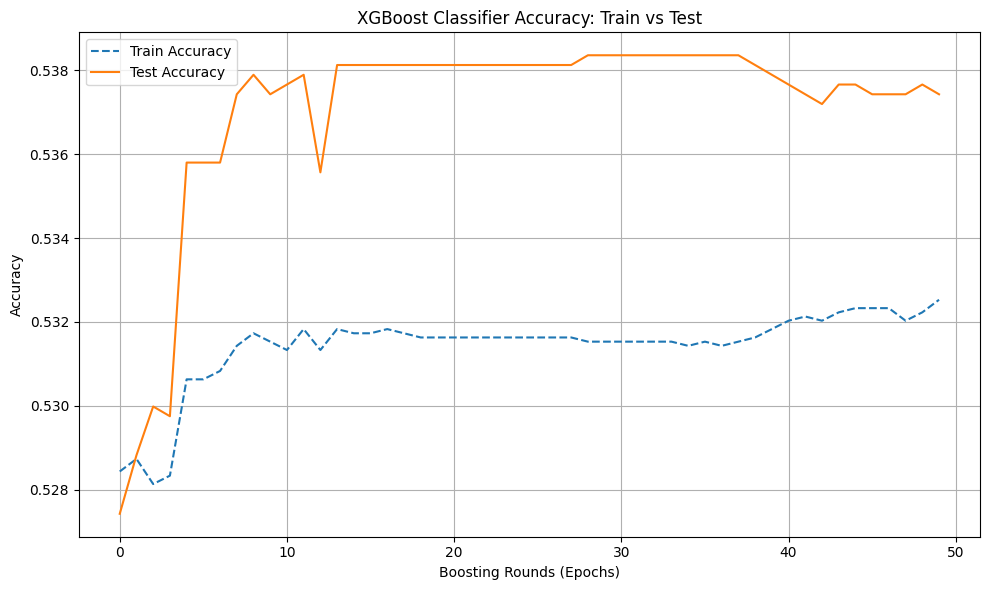

In [ ]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['league']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        num_class=3,
        use_label_encoder=False,
        random_state=42
    ))
])

param_grid = {
    'xgb__n_estimators': [50],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__max_depth': [2, 3, 5],
    'xgb__subsample': [0.8, 0.9],
    'xgb__colsample_bytree': [0.8]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train.values.ravel())

print(f"Best parameters: {grid_search.best_params_}")

best_pipeline = grid_search.best_estimator_

final_preds = best_pipeline.predict(X_test)
final_acc = accuracy_score(y_test, final_preds)
print(f"\nFinal test accuracy: {final_acc:.2%}")

best_params = grid_search.best_params_

model = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    num_class=3,
    use_label_encoder=False,
    random_state=42,
    n_estimators=best_params['xgb__n_estimators'],
    learning_rate=best_params['xgb__learning_rate'],
    max_depth=best_params['xgb__max_depth'],
    subsample=best_params['xgb__subsample'],
    colsample_bytree=best_params['xgb__colsample_bytree'],
    early_stopping_rounds=10,
    verbosity=0
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

eval_set = [(X_train_transformed, y_train), (X_test_transformed, y_test)]

model.fit(
    X_train_transformed, y_train,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(epochs)

train_accuracies = []
test_accuracies = []

for i in x_axis:
    train_preds_proba = model.predict_proba(X_train_transformed, iteration_range=(0, i + 1))
    train_preds = np.argmax(train_preds_proba, axis=1)
    train_acc = accuracy_score(y_train, train_preds)
    train_accuracies.append(train_acc)
    
    test_preds_proba = model.predict_proba(X_test_transformed, iteration_range=(0, i + 1))
    test_preds = np.argmax(test_preds_proba, axis=1)
    test_acc = accuracy_score(y_test, test_preds)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, train_accuracies, label='Train Accuracy', linestyle='--')
plt.plot(x_axis, test_accuracies, label='Test Accuracy', linestyle='-')
plt.xlabel('Boosting Rounds (Epochs)')
plt.ylabel('Accuracy')
plt.title('XGBoost Classifier Accuracy: Train vs Test')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Win - Draw - Lose - All data - rf

In [ ]:
model_df = pd.read_csv('model_data.csv')

def get_winner(row):
    if row['goals_team_1'] > row['goals_team_2']:
        return 'team_1'
    elif row['goals_team_1'] < row['goals_team_2']:
        return 'team_2'
    else:
        return 'team_0'

model_df['winner'] = model_df.apply(get_winner, axis=1)

model_df.drop(['1_formation', '2_formation', '3_formation', '4_formation', 'team_1', 'team_2', 'goals_team_1', 'goals_team_2'], axis=1, inplace=True)

In [242]:
train_dfs = []
test_dfs = []

for league in model_df['league'].unique():
    league_df = model_df[model_df['league'] == league]
    
    X_league = league_df.drop(columns=['winner'])
    y_league = league_df[['winner']]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_league, y_league, test_size=0.3, random_state=42
    )
    
    train_dfs.append((X_train, y_train))
    test_dfs.append((X_test, y_test))

X_train = pd.concat([x for x, _ in train_dfs]).reset_index(drop=True)
y_train = pd.concat([y for _, y in train_dfs]).reset_index(drop=True)

X_test = pd.concat([x for x, _ in test_dfs]).reset_index(drop=True)
y_test = pd.concat([y for _, y in test_dfs]).reset_index(drop=True)


In [ ]:
def evaluate_predictions(y_true, y_pred, skip_draw_predictions=True):
    correct = 0
    total = 0

    for true_label, pred_label in zip(y_true, y_pred):
        if skip_draw_predictions and pred_label == 'team_0':
            continue # draw perdition

        total += 1
        if true_label == pred_label:
            correct += 1

    if total == 0:
        return [0, total]
    
    accuracy = correct / total
    return [accuracy, total]

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
grid = list(ParameterGrid(param_grid))
results = []


numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['league']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])


for params in grid:
    clf = RandomForestClassifier(random_state=42, **params)

    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)

    acc, total = evaluate_predictions(y_test.values.ravel(), y_pred, skip_draw_predictions=True)
    
    results.append({
        'params': params,
        'accuracy': acc,
        'evaluated': total
    })

results = sorted(results, key=lambda x: x['accuracy'], reverse=True)

print("\nBest configuration:")
for r in results[:5]:
    print(f"Accuracy: {r['accuracy']:.2%} | Tested: {r['evaluated']} | Params: {r['params']}")
    


🏆 Najlepsze konfiguracje:
Accuracy: 53.26% | Tested: 4290 | Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 53.22% | Tested: 4280 | Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 53.14% | Tested: 4204 | Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 53.05% | Tested: 4096 | Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 52.93% | Tested: 4198 | Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


### Save model

In [ ]:
joblib.dump(model, '../models/RF_classifier.pkl')

['../models/XGB_classifier.pkl']

## Evaluation

### Model evaluation - regression models

In [ ]:
model_df = pd.read_csv('model_data.csv')

model_df.drop(['1_formation', '2_formation', '3_formation', '4_formation', 'team_1', 'team_2'], axis=1, inplace=True)

In [ ]:
train_dfs = []
test_dfs = []

for league in model_df['league'].unique():
    league_df = model_df[model_df['league'] == league]
    
    X_league = league_df.drop(columns=['goals_team_1', 'goals_team_2'])
    y_league = league_df[['goals_team_1', 'goals_team_2']]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_league, y_league, test_size=0.3, random_state=42
    )
    
    train_dfs.append((X_train, y_train))
    test_dfs.append((X_test, y_test))

X_train = pd.concat([x for x, _ in train_dfs]).reset_index(drop=True)
y_train = pd.concat([y for _, y in train_dfs]).reset_index(drop=True)

X_test = pd.concat([x for x, _ in test_dfs]).reset_index(drop=True)
y_test = pd.concat([y for _, y in test_dfs]).reset_index(drop=True)

y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}")

MAE: 0.989, RMSE: 1.269, R2: -0.040


In [ ]:
# Przekształcanie wyników do klas:
def goal_preds_to_label(g1, g2, threshold = 0):
    if g1 > g2 + threshold:
        return 'team_1'
    elif g1 + threshold < g2:
        return 'team_2'
    else:
        return 'team_0'

y_true_labels = [goal_preds_to_label(a, b, 0.4) for a, b in y_test.values]
y_pred_labels = [goal_preds_to_label(a, b, 0.4) for a, b in y_pred]

print(classification_report(y_true_labels, y_pred_labels))

              precision    recall  f1-score   support

      team_0       0.29      0.30      0.30      1142
      team_1       0.56      0.61      0.58      1795
      team_2       0.50      0.43      0.46      1365

    accuracy                           0.47      4302
   macro avg       0.45      0.45      0.45      4302
weighted avg       0.47      0.47      0.47      4302



In [ ]:
def goal_preds_to_label(g1, g2, threshold=0):
    if g1 > g2 + threshold:
        return 'team_1'
    elif g1 + threshold < g2:
        return 'team_2'
    else:
        return 'team_0'

best_threshold = None
best_accuracy = 0
best_y_true = None
best_y_pred = None

threshold_values = [round(x, 2) for x in np.arange(0.0, 1.05, 0.05)]

for threshold in threshold_values:
    y_true_labels = [goal_preds_to_label(a, b, threshold) for a, b in y_test.values]
    y_pred_labels = [goal_preds_to_label(a, b, threshold) for a, b in y_pred]

    acc = accuracy_score(y_true_labels, y_pred_labels)

    if acc > best_accuracy:
        best_accuracy = acc
        best_threshold = threshold
        best_y_true = y_true_labels
        best_y_pred = y_pred_labels

print(f"✅ Best threshold: {best_threshold}")
print(f"🎯 Accuracy: {best_accuracy:.2%}")
print("\n📊 Classification report:\n")
print(classification_report(best_y_true, best_y_pred))


✅ Best threshold: 1.0
🎯 Accuracy: 56.30%

📊 Classification report:

              precision    recall  f1-score   support

      team_0       0.68      0.66      0.67      2714
      team_1       0.39      0.45      0.42       974
      team_2       0.35      0.32      0.33       614

    accuracy                           0.56      4302
   macro avg       0.47      0.48      0.47      4302
weighted avg       0.57      0.56      0.56      4302



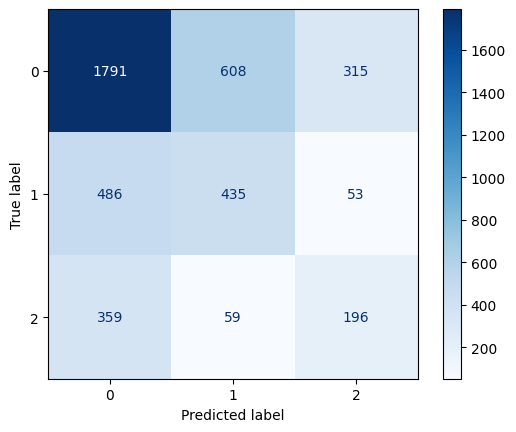

In [ ]:
cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues') 

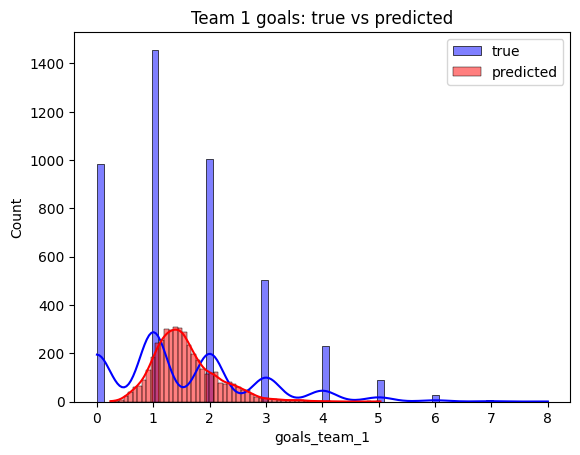

In [ ]:
sns.histplot(y_test['goals_team_1'], color='blue', label='true', kde=True)
sns.histplot(y_pred[:, 0], color='red', label='predicted', kde=True)
plt.title("Team 1 goals: true vs predicted")
plt.legend()
plt.show()

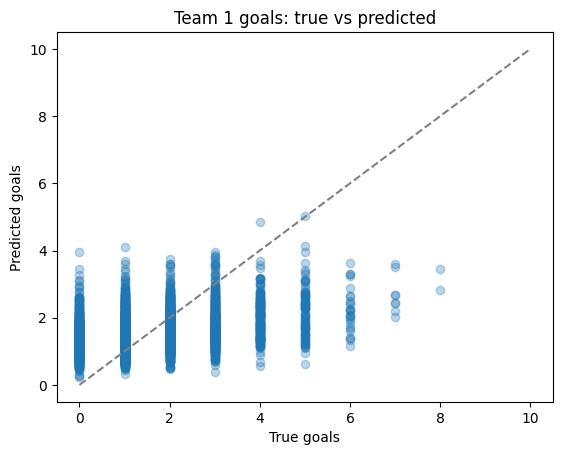

In [ ]:
plt.scatter(y_test['goals_team_1'], y_pred[:, 0], alpha=0.3)
plt.xlabel("True goals")
plt.ylabel("Predicted goals")
plt.title("Team 1 goals: true vs predicted")
plt.show()

### Model evaluation - classfier models

In [246]:
model_df = pd.read_csv('model_data.csv')

def get_winner(row):
    if row['goals_team_1'] > row['goals_team_2']:
        return 'team_1'
    elif row['goals_team_1'] < row['goals_team_2']:
        return 'team_2'
    else:
        return 'team_0'

model_df['winner'] = model_df.apply(get_winner, axis=1)

model_df.drop(['1_formation', '2_formation', '3_formation', '4_formation', 'team_1', 'team_2', 'goals_team_1', 'goals_team_2'], axis=1, inplace=True)

In [247]:
train_dfs = []
test_dfs = []

for league in model_df['league'].unique():
    league_df = model_df[model_df['league'] == league]
    
    X_league = league_df.drop(columns=['winner'])
    y_league = league_df[['winner']]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_league, y_league, test_size=0.3, random_state=42
    )
    
    train_dfs.append((X_train, y_train))
    test_dfs.append((X_test, y_test))

X_train = pd.concat([x for x, _ in train_dfs]).reset_index(drop=True)
y_train = pd.concat([y for _, y in train_dfs]).reset_index(drop=True)

X_test = pd.concat([x for x, _ in test_dfs]).reset_index(drop=True)
y_test = pd.concat([y for _, y in test_dfs]).reset_index(drop=True)


In [254]:
accuracy = accuracy_score(best_y_true, best_y_pred)
precision = precision_score(best_y_true, best_y_pred, average='weighted')
recall = recall_score(best_y_true, best_y_pred, average='weighted')
f1 = f1_score(best_y_true, best_y_pred, average='weighted')

print(f" Accuracy: {accuracy:.3f}")
print(f" Precision: {precision:.3f}")
print(f" Recall: {recall:.3f}")
print(f" F1 Score: {f1:.3f}")

 Accuracy: 0.563
 Precision: 0.568
 Recall: 0.563
 F1 Score: 0.565


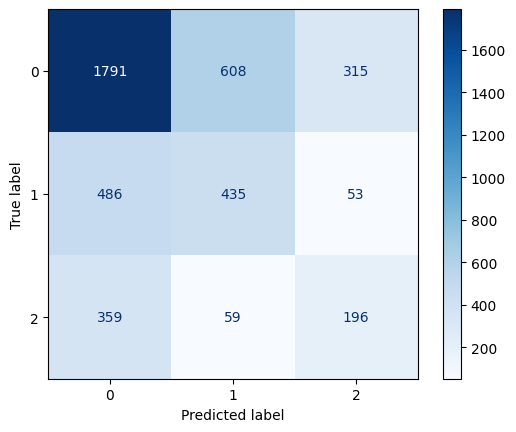

In [253]:
cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues') 

# 6 Final Betting Strategy and Profitability Analysis

This final step builds upon the previously developed models and focuses on creating betting strategies and evaluating their profitability, now incorporating taxation. Accuracy alone is insufficient; to assess profitability, we must also consider betting odds, match dates, coupon compositions, and models that are trained and tested based on entire seasons rather than random splits—thus simulating real-world scenarios. However, before progressing to this stage, it is essential to complete the `5 Models` section, including feature engineering and revising the model-building methodology.